<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#用爬取到的数据制作词云图" data-toc-modified-id="用爬取到的数据制作词云图-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>用爬取到的数据制作词云图</a></span><ul class="toc-item"><li><span><a href="#制作、保存词云图" data-toc-modified-id="制作、保存词云图-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>制作、保存词云图</a></span><ul class="toc-item"><li><span><a href="#导入相关库" data-toc-modified-id="导入相关库-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>导入相关库</a></span></li><li><span><a href="#打开文件" data-toc-modified-id="打开文件-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>打开文件</a></span></li><li><span><a href="#分词" data-toc-modified-id="分词-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>分词</a></span></li><li><span><a href="#去除停用词" data-toc-modified-id="去除停用词-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>去除停用词</a></span></li></ul></li></ul></li></ul></div>

# 用爬取到的数据制作词云图
以下代码参考：[利用python制作词云图，分词，提取关键词](https://blog.csdn.net/qq_50791662/article/details/123709658)

## 制作、保存词云图

### 导入相关库

In [1]:
import jieba
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

### 打开文件

In [2]:
with open(r'../result/操作系统A.txt', 'r', encoding='utf-8') as fp:
    f = fp.read()

### 分词

In [3]:
data_cut = jieba.lcut(f, cut_all=False)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\20866\AppData\Local\Temp\jieba.cache
Loading model cost 0.597 seconds.
Prefix dict has been built successfully.


### 去除停用词

In [4]:
# 创建一个stop_word列表，读取停用词文档，将停用词添加到列表中
stop_words_list = []
with open(r'../stop_dic/hit_stopwords.txt', 'r', encoding='utf-8') as fp:
    for line in fp:
        if len(line) > 0:
            stop_words_list.append(line.strip())  # 将字符串前后的空格去掉

In [5]:
# .新建一个列表，用于存放将分析文档库与停用词库对比后去除停用词的字符串
data_result = []
for i in data_cut:
    if i not in stop_words_list:
        i = i.replace(' ', '')
        i = i.replace('\n', '')
        if i != '':
            data_result.append(i)

In [6]:
# 将去掉停用词后的列表使用空格将其中的元素连接起来，并将其中的\n替换为空格
text = ' '.join(data_result).replace('\n', ' ')

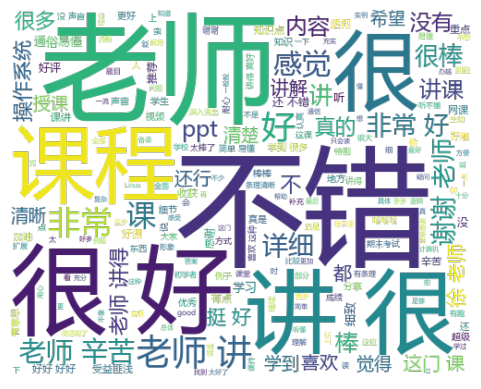

In [7]:
wc = WordCloud(font_path = r"../msyh.ttc",width=500, height=400, mode="RGBA", background_color=None).generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file(r"../result/操作系统A正负向词云图.png")